In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Step 2: Load the dataset
# Note: We'll use a classification approach by converting the continuous target into binary classes.
diabetes_data = load_diabetes()
X = diabetes_data.data
y = (diabetes_data.target > diabetes_data.target.mean()).astype(int)  # Binary classification



In [27]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
y # these are now calssified 1 versus zer0 labels for presence of disease

In [9]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split the dataset into 80% training and 20% testing data.


In [25]:
# Step 4: Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42) # set a seed for reproducibility
model.fit(X_train, y_train)

model # this model has now been trained - it has seen the X data and the associated Y values, this is supervised learning

DecisionTreeClassifier(random_state=42)

In [19]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test) # now the trained model trys to predict the y values for the test X data 

y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [15]:
# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred) # now we check the model predictions compared to the actual data set 
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.6629213483146067
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        50
           1       0.64      0.54      0.58        39

    accuracy                           0.66        89
   macro avg       0.66      0.65      0.65        89
weighted avg       0.66      0.66      0.66        89



In [ ]:
# F1 Score = 1: Perfect precision and recall.

# Represented a balance of precision and recall in our model 
# e.g. Precision: 0.80 (80% of the predicted positives were correct)
# e.g. Recall: 0.89 (89% of actual positives were detected)

# When to prioritize precision: If false positives are more costly (e.g., cancer diagnosis).
# When to prioritize recall: If missing a positive case is more costly (e.g., identifying a contagious disease).

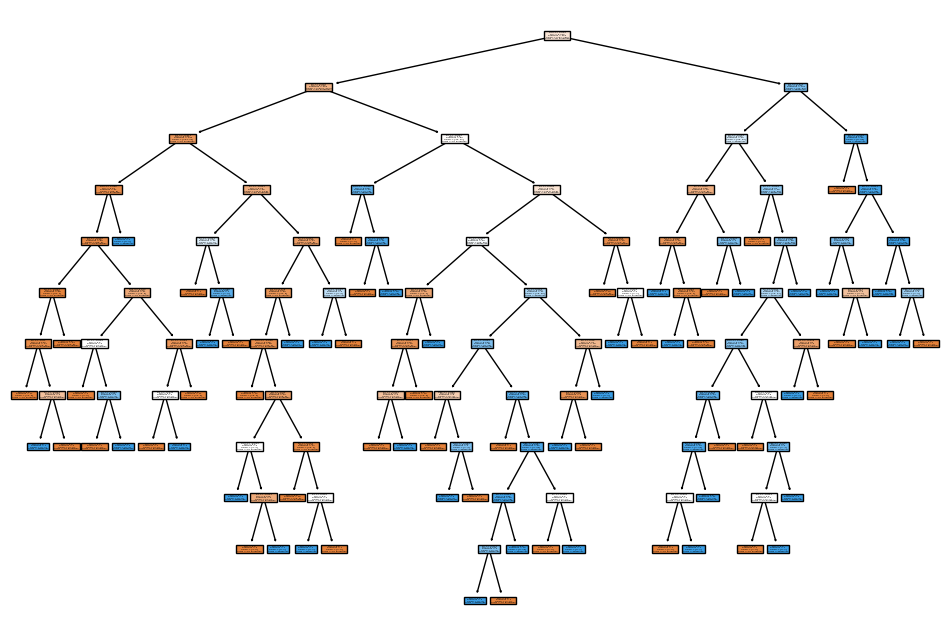

In [17]:
# Bonus: Visualize a simple decision tree (Optional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=diabetes_data.feature_names, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()
